**<h1>RenAIssance L.L.E. Challenge</h1>**

**<h3>Imports</h3>**

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from datetime import timedelta
from math import sqrt
from keras import Sequential
from keras.layers import SimpleRNN, Dense, LSTM
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

**<h3>Reading CSV file</h3>**

In [2]:
df_import = pd.read_csv(r'/Users/LaurensKrook/Documents/Universiteit van Amsterdam; Kunstmatige Intelligentie/Jaar 2/Semester 1/Leren en Beslissen/General/Data/Houses/Houses58-75/House64-1m.csv')

In [3]:
df_export = pd.read_csv(r'/Users/LaurensKrook/Documents/Universiteit van Amsterdam; Kunstmatige Intelligentie/Jaar 2/Semester 1/Leren en Beslissen/General/Data/Houses/Houses58-75/House64-1m.csv')

In [4]:
df_weather = pd.read_csv(r'/Users/LaurensKrook/Documents/Universiteit van Amsterdam; Kunstmatige Intelligentie/Jaar 2/Semester 1/Leren en Beslissen/General/Data/Weather/weather_data.csv')

**<h3>Generating dataframes</h3>**

**<h6>Dataframe import</h6>**

In [5]:
df_import.set_index('timestamp', inplace = True)
df_import.index = pd.to_datetime(df_import.index)
df_import = df_import.resample('5T').mean()
df_import = df_import.loc['2020-04-01 04:00:00+02:00':'2020-04-09 03:59:00+02:00']
df_import

,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW
timestamp,,,,,
2020-04-01 04:00:00+02:00,0.0,0.264,0.000,0.264,0.264
2020-04-01 04:05:00+02:00,0.0,0.276,0.000,0.276,0.276
2020-04-01 04:10:00+02:00,0.0,0.252,0.000,0.252,0.252
2020-04-01 04:15:00+02:00,0.0,0.264,0.000,0.264,0.264
2020-04-01 04:20:00+02:00,0.0,0.180,0.000,0.180,0.180
...,...,...,...,...,...
2020-04-09 03:35:00+02:00,0.0,0.240,-0.012,0.240,0.252
2020-04-09 03:40:00+02:00,0.0,0.336,0.000,0.336,0.336
2020-04-09 03:45:00+02:00,0.0,0.408,0.000,0.408,0.408


**<h6>Dataframe Export </h6>**

In [6]:
df_export['timestamp'] = pd.to_datetime(df_export.timestamp, format='%Y-%m-%d %H:%M:%S')
df_export['HH'] = df_export['timestamp'].dt.hour
df_export['Date'] = df_export['timestamp'].dt.date
df_export['Minute'] = df_export['timestamp'].dt.minute
df_export['Date'] = pd.to_datetime(df_export['Date']).dt.strftime('%Y%m%d').astype(int)
df_export = df_export.set_index('timestamp')
df_export = df_export.loc['2020-04-01 04:00:00+02:00':'2020-04-08 03:59:00+02:00']
df_export

,house,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW,HH,Date,Minute
timestamp,,,,,,,,,
2020-04-01 04:00:00+02:00,House64,0.0,0.30,0.0,0.30,0.30,4,20200401,0
2020-04-01 04:01:00+02:00,House64,0.0,0.30,0.0,0.30,0.30,4,20200401,1
2020-04-01 04:02:00+02:00,House64,0.0,0.24,0.0,0.24,0.24,4,20200401,2
2020-04-01 04:03:00+02:00,House64,0.0,0.24,0.0,0.24,0.24,4,20200401,3
2020-04-01 04:04:00+02:00,House64,0.0,0.24,0.0,0.24,0.24,4,20200401,4
...,...,...,...,...,...,...,...,...,...
2020-04-08 03:55:00+02:00,House64,0.0,0.12,0.0,0.12,0.12,3,20200408,55
2020-04-08 03:56:00+02:00,House64,0.0,0.12,0.0,0.12,0.12,3,20200408,56
2020-04-08 03:57:00+02:00,House64,0.0,0.06,0.0,0.06,0.06,3,20200408,57


**<h6>Dataframe Weather </h6>**

In [7]:
df_weather = df_weather.drop(columns=['    Y', '    O', '    S', '    R', '    M', '   WW', '    N', '   VV', '    P', 'Unnamed: 0', '  STN', '   IX', '   DD', '   FH', '   FF', '   FX', ' T10N', '   TD', '   DR', '   RH', '    U', '    T'])
df_weather = df_weather.rename(columns={'YYYYMMDD': 'Date', '   HH':'HH'})
df_weather

,Date,HH,SQ,Q
0,20180801,1,0,0
1,20180801,2,0,0
2,20180801,3,0,0
3,20180801,4,0,0
4,20180801,5,5,15
...,...,...,...,...
18283,20200831,20,0,0
18284,20200831,21,0,0
18285,20200831,22,0,0
18286,20200831,23,0,0


**<h3>IMPORT_KW</h3>**

In [8]:
import_kw = df_import['IMPORT_KW']
len_test = len(import_kw)-(288)
train = list(import_kw)[:len_test]
test = list(import_kw)[(len_test-100):]

**<h6>Training</h6>**

In [9]:
windowSize, X_train, y_train = 100, [], []
for index in range(len(test)-windowSize):
    X_train.append(train[index:index+windowSize])
    y_train.append(train[index+windowSize])

**<h6>Model</h6>**

In [10]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(100,1), return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
9/9 [==============================] - 2s 38ms/step - loss: 0.2458 - mae: 0.3318
Epoch 2/5
9/9 [==============================] - 0s 44ms/step - loss: 0.0913 - mae: 0.1722
Epoch 3/5
9/9 [==============================] - 0s 38ms/step - loss: 0.0706 - mae: 0.1390
Epoch 4/5
9/9 [==============================] - 0s 38ms/step - loss: 0.0649 - mae: 0.1457
Epoch 5/5
9/9 [==============================] - 0s 38ms/step - loss: 0.0651 - mae: 0.1331


In [11]:
y_train_pred_model = model.predict(X_train)

**<h6>Test</h6>**

In [12]:
windowSize, X_test, y_test = 100, [], []
for index in range(len(test)-windowSize):
    X_test.append(test[index:index+windowSize])
    y_test.append(test[index+windowSize])

In [13]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape((len(X_test), 100,1))

In [14]:
y_test_pred_model = model.predict(X_test)

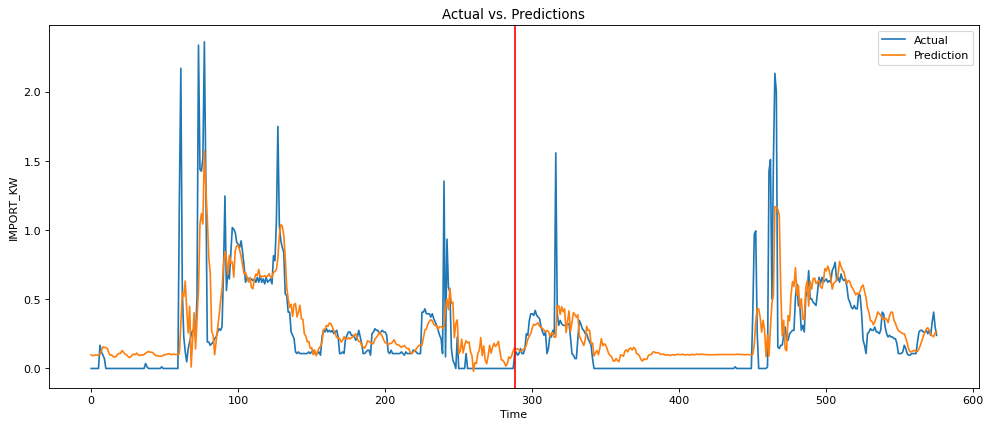

In [15]:
def plot_result(y_train, y_test, y_train_pred_model, y_test_pred_model):
    actual = np.append(y_train, y_test)
    predictions = np.append(y_train_pred_model, y_test_pred_model)
    rows = len(actual)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(y_train), color='r')
    plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_train_pred_model, y_test_pred_model)

**<h3>EXPORT_KW</h3>**

In [16]:
next_hour = df_export["HH"].iloc[-1]+1
current_date = df_export['Date'].iloc[-1]
df_weather_2 = df_weather.loc[(df_weather['HH'] == next_hour) & (df_weather['Date'] == current_date)]
index = np.linspace(int(df_weather_2.index.values), int(df_weather_2.index.values)+23)
df_predict = df_weather[df_weather.index.isin(index)]
df_predict

,Date,HH,SQ,Q
14787,20200408,4,0,0
14788,20200408,5,0,0
14789,20200408,6,7,20
14790,20200408,7,5,59
14791,20200408,8,10,105
14792,20200408,9,10,172
14793,20200408,10,10,212
14794,20200408,11,10,240
14795,20200408,12,10,255
14796,20200408,13,10,246


In [17]:
df_house = df_export.groupby(['Date', 'HH'])['EXPORT_KW'].mean().reset_index()
df_house.loc[df_house["HH"] == 0, 'HH'] = 24
df_house

,Date,HH,EXPORT_KW
0,20200401,4,0.000
1,20200401,5,0.000
2,20200401,6,0.000
3,20200401,7,0.000
4,20200401,8,0.012
...,...,...,...
163,20200407,23,0.000
164,20200408,24,0.000
165,20200408,1,0.000
166,20200408,2,0.000


In [18]:
df_training = pd.merge(df_weather, df_house, on=["Date", "HH"])
df_training

,Date,HH,SQ,Q,EXPORT_KW
0,20200401,4,0,0,0.000
1,20200401,5,0,0,0.000
2,20200401,6,7,21,0.000
3,20200401,7,7,62,0.000
4,20200401,8,0,54,0.012
...,...,...,...,...,...
163,20200407,24,0,0,0.000
164,20200408,1,0,0,0.000
165,20200408,2,0,0,0.000
166,20200408,3,0,0,0.000


In [19]:
X_train = df_training[['   SQ', '    Q']].values
X_test = df_predict[['   SQ', '    Q']].values
Y_train = df_training['EXPORT_KW'].values.reshape(-1,1)

**<h6> Model</h6>**

In [20]:
def polynomial(X, degree):
    poly = PolynomialFeatures(degree) 
    poly.fit(X)
    X_poly = poly.transform(X)
    return X_poly

# Generate polynomial dataset (both training and test)
poly_train = polynomial(X_train, 4)
poly_test = polynomial(X_test, 4)
    
# Scale all features using the MinMaxScaler
scaler = MinMaxScaler().fit(poly_train)
poly_train_scaled = scaler.transform(poly_train)
    
scaler = MinMaxScaler().fit(poly_test)
poly_test_scaled = scaler.transform(poly_test)

# Compute and print RMSE using your code above on the training set and on the test set
lr = LinearRegression().fit(poly_train_scaled, Y_train)
# Y_poly_pred_train = lr.predict(poly_train_scaled)  
Y_poly_pred_test = lr.predict(poly_test_scaled)

**<h3> Data to CSV </h3>**

**<h6> Dataframe predicted import </h6>**

In [23]:
test = import_kw[len_test:]
train = import_kw[:len_test]
data = y_test_pred_model
df_prediction_import = pd.DataFrame(data, columns = ['Prediction_IMPORT_KW'])
df_prediction_import['timestamp'] = pd.date_range(start=test.index[0], periods=len(df_prediction_import), freq='5T')
df_prediction_import.set_index('timestamp', inplace = True)
df_prediction_import.index= pd.to_datetime(df_prediction_import.index)
df_prediction_import

,Prediction_IMPORT_KW
timestamp,
2020-04-08 04:00:00+02:00,0.148619
2020-04-08 04:05:00+02:00,0.137940
2020-04-08 04:10:00+02:00,0.143004
2020-04-08 04:15:00+02:00,0.132478
2020-04-08 04:20:00+02:00,0.123039
...,...
2020-04-09 03:35:00+02:00,0.246444
2020-04-09 03:40:00+02:00,0.235880
2020-04-09 03:45:00+02:00,0.230278


**<h6> Dataframe predicted export </h6>**

In [24]:
Y_pred_5minutes = np.repeat(Y_poly_pred_test,12)
# setting all negative values to 0
Y_pred_5minutes = [0 if i < 0 else i for i in Y_pred_5minutes]
df_prediction_export = pd.DataFrame(Y_pred_5minutes, columns = ['Prediction_EXPORT_KW'])
df_prediction_export['timestamp'] = pd.date_range(start=df_export.index[-1]+ timedelta(minutes=1), periods=len(df_prediction_export), freq='5T')
df_prediction_export.set_index('timestamp', inplace = True)
df_prediction_export.index= pd.to_datetime(df_prediction_export.index)
df_prediction_export

,Prediction_EXPORT_KW
timestamp,
2020-04-08 04:00:00+02:00,0.0
2020-04-08 04:05:00+02:00,0.0
2020-04-08 04:10:00+02:00,0.0
2020-04-08 04:15:00+02:00,0.0
2020-04-08 04:20:00+02:00,0.0
...,...
2020-04-09 03:35:00+02:00,0.0
2020-04-09 03:40:00+02:00,0.0
2020-04-09 03:45:00+02:00,0.0


**<h6>Predictions Import_KW and Export_KW</h6>**

In [52]:
final = pd.concat([df_prediction_export, df_prediction_import], axis=1, join='inner')
final

,Prediction_EXPORT_KW,Prediction_IMPORT_KW
timestamp,,
2020-04-08 04:00:00+02:00,0.0,0.148619
2020-04-08 04:05:00+02:00,0.0,0.137940
2020-04-08 04:10:00+02:00,0.0,0.143004
2020-04-08 04:15:00+02:00,0.0,0.132478
2020-04-08 04:20:00+02:00,0.0,0.123039
...,...,...
2020-04-09 03:35:00+02:00,0.0,0.246444
2020-04-09 03:40:00+02:00,0.0,0.235880
2020-04-09 03:45:00+02:00,0.0,0.230278


In [53]:
# final.to_csv('pred-64m20200408T0400.csv')

**<h3>Plotting the predictions and the actual data </h3>**

**<h6> Prediction Plot </h6>**

<AxesSubplot:xlabel='timestamp'>

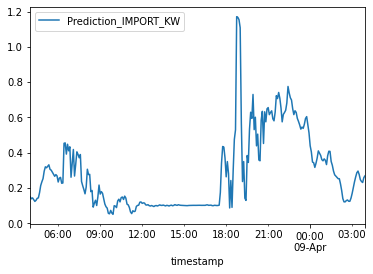

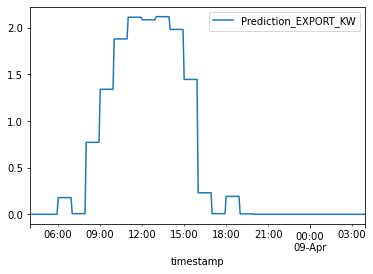

In [54]:
df_prediction_import.plot() 
df_prediction_export.plot()

<module 'matplotlib.pyplot' from '/Users/LaurensKrook/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

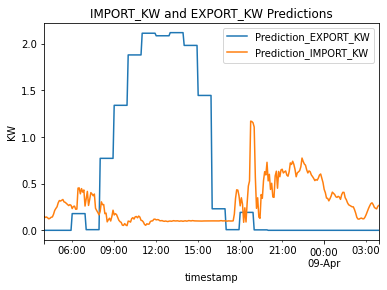

In [55]:
final.plot()
plt.ylabel('KW')
plt.title('IMPORT_KW and EXPORT_KW Predictions')
plt

**<h6>Acutal data and prediction plot </h6>**

In [58]:
df = pd.read_csv(r'/Users/LaurensKrook/Documents/Universiteit van Amsterdam; Kunstmatige Intelligentie/Jaar 2/Semester 1/Leren en Beslissen/General/Data/Houses/Houses58-75/House64-1m.csv')
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('timestamp')
df = df.loc['2020-04-08 04:00:00+02:00':'2020-04-09 03:59:00+02:00']
df = df.resample('5T').mean()
df = df.drop(columns=['PV_KW', 'TOTAL_KW', 'UNC_KW'])

In [59]:
actual_and_prediction = pd.concat([df, final], axis=1, join='inner')
actual_and_prediction

,EXPORT_KW,IMPORT_KW,Prediction_EXPORT_KW,Prediction_IMPORT_KW
timestamp,,,,
2020-04-08 04:00:00+02:00,0.0,0.096,0.0,0.148619
2020-04-08 04:05:00+02:00,0.0,0.120,0.0,0.137940
2020-04-08 04:10:00+02:00,0.0,0.096,0.0,0.143004
2020-04-08 04:15:00+02:00,0.0,0.108,0.0,0.132478
2020-04-08 04:20:00+02:00,0.0,0.144,0.0,0.123039
...,...,...,...,...
2020-04-09 03:35:00+02:00,0.0,0.240,0.0,0.246444
2020-04-09 03:40:00+02:00,0.0,0.336,0.0,0.235880
2020-04-09 03:45:00+02:00,0.0,0.408,0.0,0.230278


<module 'matplotlib.pyplot' from '/Users/LaurensKrook/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

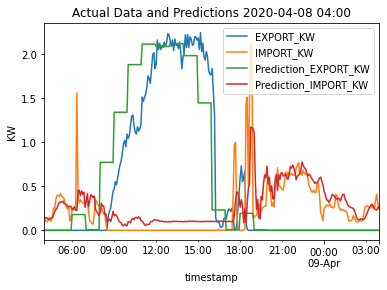

In [60]:
actual_and_prediction.plot()
plt.ylabel('KW')
plt.title('Actual Data and Predictions 2020-04-08 04:00')
plt

**<h6> Import Actual vs. Predictions </h6>**

In [67]:
comperison_import = actual_and_prediction
comperison_import = comperison_import.drop(columns=['EXPORT_KW', 'Prediction_EXPORT_KW'])

<module 'matplotlib.pyplot' from '/Users/LaurensKrook/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

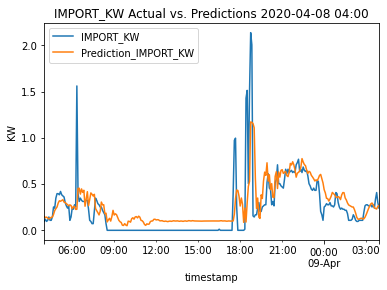

In [65]:
comperison_import.plot()
plt.ylabel('KW')
plt.title('IMPORT_KW Actual vs. Predictions 2020-04-08 04:00')
plt

**<h6>Export Actual vs. Predictions </h6>**

In [68]:
comperison_export = actual_and_prediction
comperison_export = comperison_export.drop(columns=['IMPORT_KW', 'Prediction_IMPORT_KW'])

<module 'matplotlib.pyplot' from '/Users/LaurensKrook/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

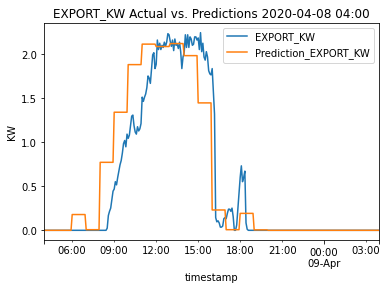

In [69]:
comperison_export.plot()
plt.ylabel('KW')
plt.title('EXPORT_KW Actual vs. Predictions 2020-04-08 04:00')
plt